In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
df = pd.read_csv(r'/Users/mrunalidhoble/Downloads/thyroidDF.csv')

In [7]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [8]:
df['target'].sort_values().unique()

array(['-', 'A', 'AK', 'B', 'C', 'C|I', 'D', 'D|R', 'E', 'F', 'FK', 'G',
       'GI', 'GK', 'GKJ', 'H|K', 'I', 'J', 'K', 'KJ', 'L', 'LJ', 'M',
       'MI', 'MK', 'N', 'O', 'OI', 'P', 'Q', 'R', 'S'], dtype=object)

In [13]:
 mapping = {'-':'Negative',
'A':'Hyperthyroid','AK':'Hyperthyroid','B':'Hyperthyroid','C':
 'Hyperthyroid','C|I':'Hyperthyroid','D':'Hyperthyroid','D|R':'Hyperthyroid',
'E':'Hypothyroid','F':'Hypothyroid','FK':'Hypothyroid','G':
 'Hypothyroid','GK':'Hypothyroid','GI':'Hypothyroid','GKJ':
 'Hypothyroid','H|K':'Hypothyroid',
'I':'Hypothyroid','J':'Hypothyroid','K':'Hypothyroid','KJ':
 'Hypothyroid','L':'Hypothyroid','LJ':'Hypothyroid','M':'Hypothyroid','MI':
 'Hypothyroid',
'MK':'Hypothyroid','N':'Hypothyroid','O':'Hypothyroid','OI':
 'Hypothyroid','P':'Hypothyroid','Q':'Hypothyroid','R':'Hypothyroid','S':
 'Hypothyroid',
}

In [14]:
 df['target'] = df['target'].map(mapping)

In [15]:
df['target'].unique()

array(['Negative', 'Hypothyroid', 'Hyperthyroid'], dtype=object)

In [16]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,Negative,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,Negative,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,Negative,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,Negative,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,Hypothyroid,840803047


In [17]:
df.isna().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [19]:
 df = df.drop(['sex','referral_source','patient_id'],axis=1)

In [20]:
df.dropna(inplace=True)

In [21]:
df.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
167,40,f,f,f,f,f,f,f,f,f,...,0.4,t,3.9,t,0.83,t,5.0,t,28.0,Hypothyroid
5256,35,f,f,f,f,f,t,f,f,f,...,1.9,t,73.0,t,1.16,t,63.0,t,37.0,Negative
6044,77,f,f,f,f,f,f,f,f,f,...,1.8,t,120.0,t,0.96,t,124.0,t,45.0,Negative
6045,73,f,f,f,f,f,f,f,f,f,...,1.6,t,89.0,t,0.74,t,119.0,t,24.0,Negative
6681,78,f,f,f,f,f,f,f,f,f,...,2.2,t,103.0,t,0.90,t,114.0,t,30.0,Hypothyroid


In [22]:
lbl_encoder = LabelEncoder()
df['target']=lbl_encoder.fit_transform(df['target'])

In [23]:
df=df.replace('f',0)
df=df.replace('t',1)

In [24]:
df.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
167,40,0,0,0,0,0,0,0,0,0,...,0.4,1,3.9,1,0.83,1,5.0,1,28.0,1
5256,35,0,0,0,0,0,1,0,0,0,...,1.9,1,73.0,1,1.16,1,63.0,1,37.0,2
6044,77,0,0,0,0,0,0,0,0,0,...,1.8,1,120.0,1,0.96,1,124.0,1,45.0,2
6045,73,0,0,0,0,0,0,0,0,0,...,1.6,1,89.0,1,0.74,1,119.0,1,24.0,2
6681,78,0,0,0,0,0,0,0,0,0,...,2.2,1,103.0,1,0.90,1,114.0,1,30.0,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'on_thyroxine'),
  Text(2, 0, 'query_on_thyroxine'),
  Text(3, 0, 'on_antithyroid_meds'),
  Text(4, 0, 'sick'),
  Text(5, 0, 'pregnant'),
  Text(6, 0, 'thyroid_surgery'),
  Text(7, 0, 'I131_treatment'),
  Text(8, 0, 'query_hypothyroid'),
  Text(9, 0, 'query_hyperthyroid'),
  Text(10, 0, 'lithium'),
  Text(11, 0, 'goitre'),
  Text(12, 0, 'tumor'),
  Text(13, 0, 'hypopituitary'),
  Text(14, 0, 'psych'),
  Text(15, 0, 'TSH_measured'),
  Text(16, 0, 'TSH'),
  Text(17, 0, 'T3_measured'),
  Text(18, 0, 'T3'),
  Text(19, 0, 'TT4_measured'),
  Text(20, 0, 'TT4'),
  Text(21, 0, 'T4U_measured'),
  Text(22, 0, 'T4U'),
  Text(23, 0, 'FTI_measured'),
  Text(24, 0, 'FTI'),
  Text(25, 0, 'TBG_measured'),
  Text(26, 0, 'TBG'),
  Text(27, 0, 'target')])

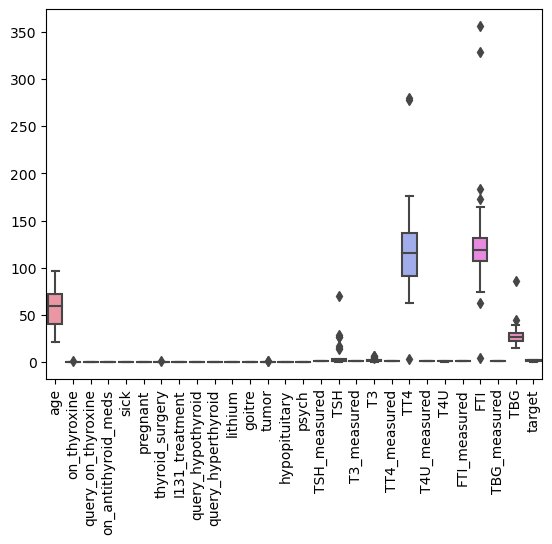

In [25]:
 sns.boxplot(df)
plt.xticks(rotation=90)

In [30]:
def outliers (df, ft):
   Q1=df[ft].quantile (0.25)
   Q3=df[ft].quantile (0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5*IQR
   upper_bound = Q3 + 1.5* IQR
   ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
   return ls

In [32]:
index_list = []
for feature in ["TSH", "T3", "TT4", "FTI", "TBG"]:
  index_list.extend(outliers(df, feature))

In [33]:
 def remove(df, ls):
   ls = sorted(set(ls))
   df = df.drop(ls)
   return df

In [34]:
df_cleaned = remove(df, index_list)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'on_thyroxine'),
  Text(2, 0, 'query_on_thyroxine'),
  Text(3, 0, 'on_antithyroid_meds'),
  Text(4, 0, 'sick'),
  Text(5, 0, 'pregnant'),
  Text(6, 0, 'thyroid_surgery'),
  Text(7, 0, 'I131_treatment'),
  Text(8, 0, 'query_hypothyroid'),
  Text(9, 0, 'query_hyperthyroid'),
  Text(10, 0, 'lithium'),
  Text(11, 0, 'goitre'),
  Text(12, 0, 'tumor'),
  Text(13, 0, 'hypopituitary'),
  Text(14, 0, 'psych'),
  Text(15, 0, 'TSH_measured'),
  Text(16, 0, 'TSH'),
  Text(17, 0, 'T3_measured'),
  Text(18, 0, 'T3'),
  Text(19, 0, 'TT4_measured'),
  Text(20, 0, 'TT4'),
  Text(21, 0, 'T4U_measured'),
  Text(22, 0, 'T4U'),
  Text(23, 0, 'FTI_measured'),
  Text(24, 0, 'FTI'),
  Text(25, 0, 'TBG_measured'),
  Text(26, 0, 'TBG'),
  Text(27, 0, 'target')])

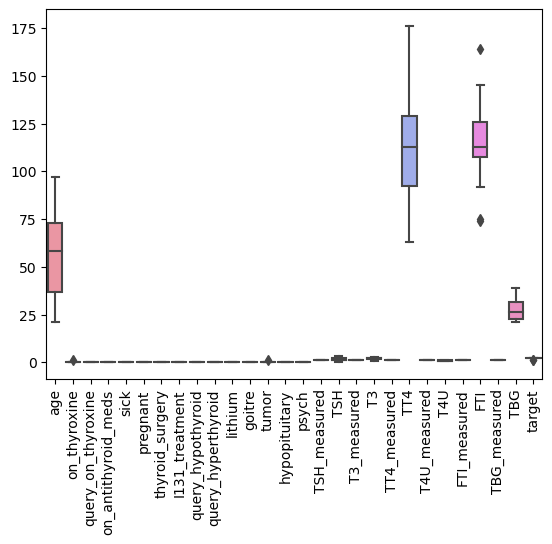

In [35]:
sns.boxplot(df_cleaned)
plt.xticks(rotation=90)

In [36]:
X = df_cleaned.drop("target", axis = 1)
y = df_cleaned["target"]

In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,
 random_state=0)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(Xtrain)
X_test_std = scaler.transform(Xtest)

In [40]:
svm=SVC(kernel='linear',decision_function_shape='ovo', verbose=True)

In [41]:
svm.fit(X_train_std, ytrain)

[LibSVM]*
optimization finished, #iter = 1
obj = -0.053642, rho = 1.067598
nSV = 2, nBSV = 0
Total nSV = 2


SVC(decision_function_shape='ovo', kernel='linear', verbose=True)

In [42]:
svm.score(X_train_std, ytrain)

1.0

In [43]:
svm.score(X_test_std, ytest)

0.75